# MINI PROJECT ML

`Topic` - Stroke Prediction using Machine Learning

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [180]:
pd.options.display.max_rows=500

## Question (1-10)
### 1. Read the dataset and view the first 10 rows of it.
### 2. Check the shape/dimension of the dataset
### 3. Check for the missing values.Display number of missing values per column.
### 4. Investigate and predict the missing BMI Value.
### 5. Check the datatype, number of non null values and name of each variable in the dataset.
### 6. Check the descriptive statistics of the dataset.
### 7. Visualize the proportion of Stroke samples in the dataset.
### 8. Visualize the Distribution of Male and Female Ages. Write the Observation.
### 9.Visualize the stroke sample based on a) BMI and Glucose Level b) BMI and Age
### 10.Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

In [181]:
df_raw=pd.read_csv('healthcare-dataset-stroke-data.csv')
df_raw.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [182]:
print('Rows:',df_raw.shape[0])
print('Columns:',df_raw.shape[1])

Rows: 5110
Columns: 12


In [183]:
df_raw.duplicated().value_counts()

False    5110
dtype: int64

In [184]:
count=pd.DataFrame(df_raw.isnull().sum(),columns=['Count'])
per=pd.DataFrame((df_raw.isnull().sum()/(len(df_raw)))*100,columns=['Percentage'])
total=pd.concat([count,per],axis=1)
total

,Count,Percentage
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464


In [185]:
round((df_raw.bmi.isnull().sum()/(len(df_raw)))*100,2)

3.93

In [186]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [187]:
df_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

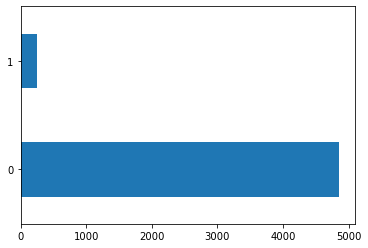

In [188]:
df_raw.stroke.value_counts().plot.barh()
# we can clearly see there is imbalance in stroke variable

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

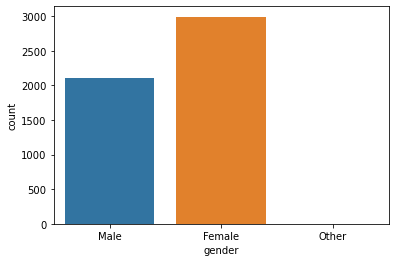

In [189]:
print(df_raw.gender.value_counts())
sns.countplot(df_raw.gender)
# there are three sub-categories in gender Male,female,Other

<AxesSubplot:xlabel='bmi', ylabel='age'>

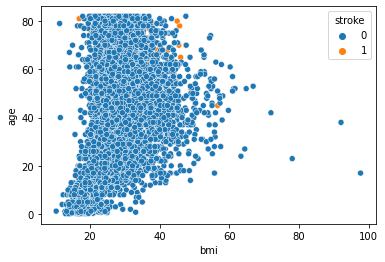

In [190]:
sns.scatterplot(df_raw.bmi,df_raw.age,hue=df_raw.stroke)

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

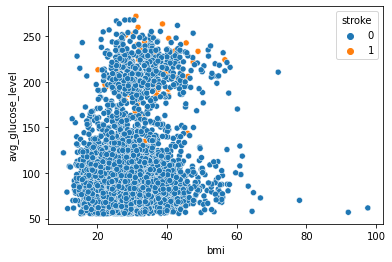

In [191]:
sns.scatterplot(df_raw.bmi,df_raw.avg_glucose_level,hue=df_raw.stroke)

<AxesSubplot:ylabel='smoking_status'>

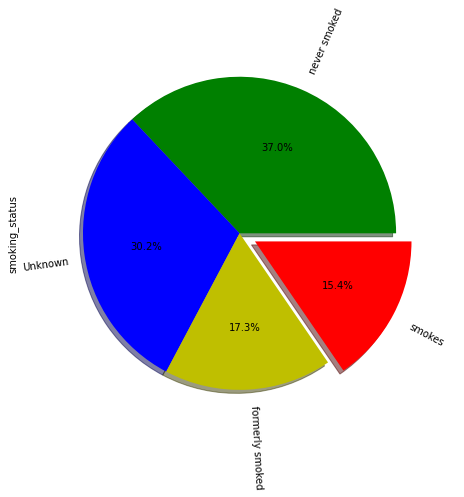

In [192]:
plt.figure(figsize=(8,8))
c=['g','b','y','r']
e=[0,0,0,0.1]
df_raw.smoking_status.value_counts().plot.pie(autopct='%0.1f%%',colors=c,explode=e,shadow=True,rotatelabels=True,radius=0.9)

# Question (11-21)
### 11.Perform hypothesis testing to find the significant variables.
### 12.Drop the unnecessary columns.
### 13.Write the code to replace following categories columns in integer format as follow – a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2) b) ever_married('Yes': 1, 'No': 0) c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)
### 14.Check the distribution of 'bmi' and 'stroke' columns in the dataset.
### 15.List down columns that are highly skewed.
### 16.List down the columns that are highly kurtosis.
### 17.Find the distribution of all variables with respect to the outcome 'stroke' variable.
### 18.Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)
### 19.Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.
### 20.Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.
### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.


In [193]:
from scipy.stats import chi2_contingency
# Stroke and hypertension
# Stroke and heartdisease 
# H0(null):Not-Significant
# H1(alternate):Significant
sig_lev=0.05
st_hy=pd.crosstab(df_raw.stroke,df_raw.hypertension)
st_hd=pd.crosstab(df_raw.stroke,df_raw.heart_disease)
st1,pval1,dof1,exp1=chi2_contingency(st_hy)
st2,pval2,dof2,exp2=chi2_contingency(st_hd)
print(pval1,'->','significant_variable(hypertension)'if pval1 < sig_lev else 'not-significant_variable(hypertension)')
print(pval2,'->','significant_variable(heart_disease)'if pval2 < sig_lev else 'not-significant_variable(heart_disease)')

1.661621901511823e-19 -> significant_variable(hypertension)
2.0887845685229236e-21 -> significant_variable(heart_disease)


In [194]:
df_upd=df_raw.copy()

In [195]:
#Droping unnecessary columns
df_upd.drop(['id','Residence_type'],axis=1,inplace=True)

In [196]:
df_upd.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [197]:
df_upd.gender=df_upd.gender.replace(to_replace='Other',value='Female')

In [198]:
df_upd.gender=df_upd.gender.map({'Male':0,'Female':1}).astype(int)

In [199]:
df_upd.smoking_status=df_upd.smoking_status.map({'smokes':0,'formerly smoked':1,'never smoked':2,'Unknown':3}).astype(int)

In [200]:
df_upd.work_type=df_upd.work_type.map({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2}).astype(int)

In [201]:
df_upd.ever_married=df_upd.ever_married.map({'Yes': 1, 'No': 0}).astype(int)

In [202]:
df_upd.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,228.69,36.6,1,1
1,1,61.0,0,0,1,1,202.21,NaN,2,1


Text(0.5, 1.0, 'Distribution of Stroke')

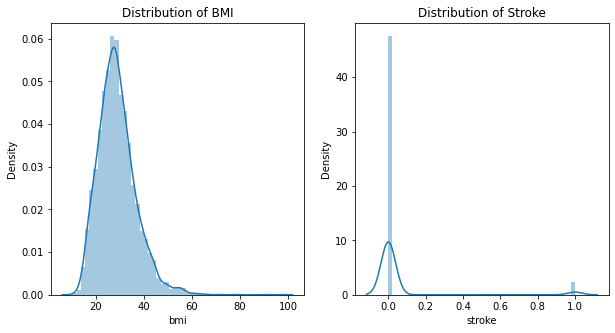

In [203]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_upd.bmi,ax=ax[0])
sns.distplot(df_upd.stroke,ax=ax[1])
ax[0].set_title('Distribution of BMI')
ax[1].set_title('Distribution of Stroke')

avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64


<AxesSubplot:xlabel='bmi', ylabel='Density'>

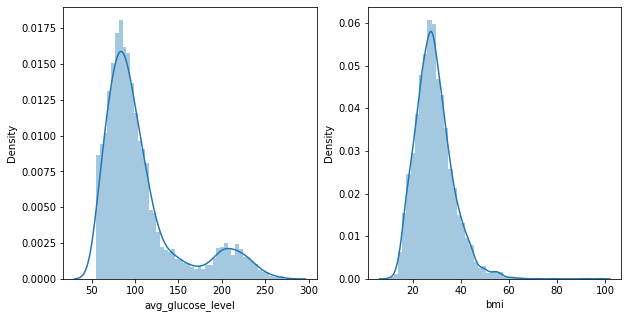

In [204]:
print(df_upd[['avg_glucose_level','bmi']].skew())
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_upd.avg_glucose_level,ax=ax[0])
sns.distplot(df_upd.bmi,ax=ax[1])

gender               -1.878411
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.085432
avg_glucose_level     1.680479
bmi                   3.362659
smoking_status       -0.902681
stroke               15.589736
dtype: float64


<AxesSubplot:xlabel='stroke', ylabel='Density'>

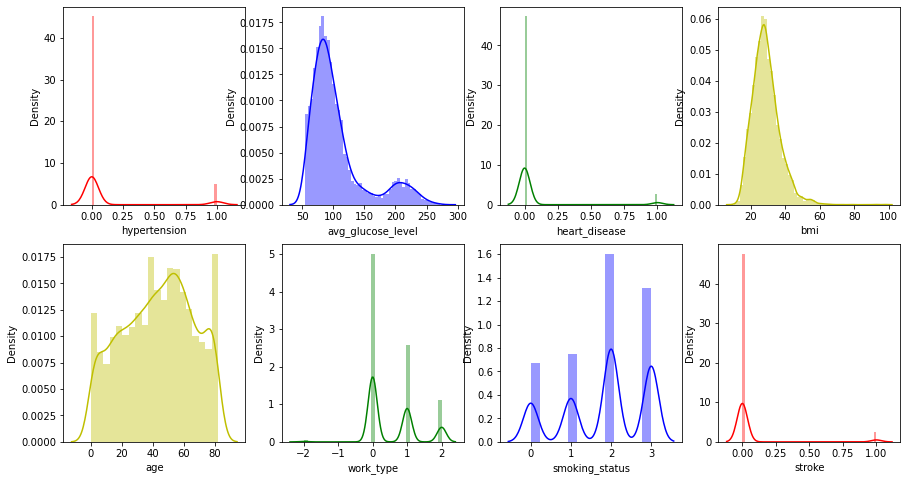

In [205]:
print(df_upd.kurtosis())
fig,ax=plt.subplots(2,4,figsize=(15,8))
sns.distplot(df_upd.hypertension,ax=ax[0,0],color='r')
sns.distplot(df_upd.avg_glucose_level,ax=ax[0,1],color='b')
sns.distplot(df_upd.heart_disease,ax=ax[0,2],color='g')
sns.distplot(df_upd.bmi,ax=ax[0,3],color='y')
sns.distplot(df_upd.age,ax=ax[1,0],color='y')
sns.distplot(df_upd.work_type,ax=ax[1,1],color='g')
sns.distplot(df_upd.smoking_status,ax=ax[1,2],color='b')
sns.distplot(df_upd.stroke,ax=ax[1,3],color='r')

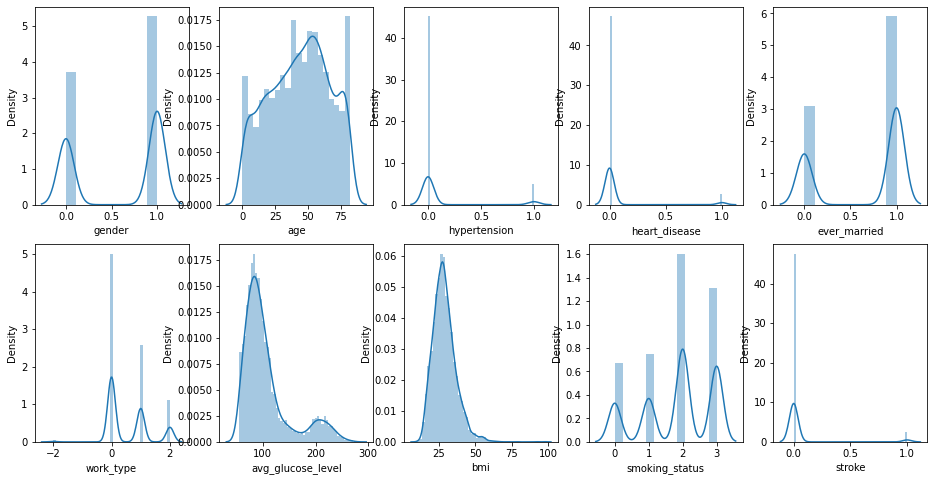

In [206]:
fig,ax=plt.subplots(2,5,figsize=(16,8))
for i,subplots in zip(df_upd.columns,ax.flatten()):
    sns.distplot(df_upd[i],ax=subplots)

<AxesSubplot:>

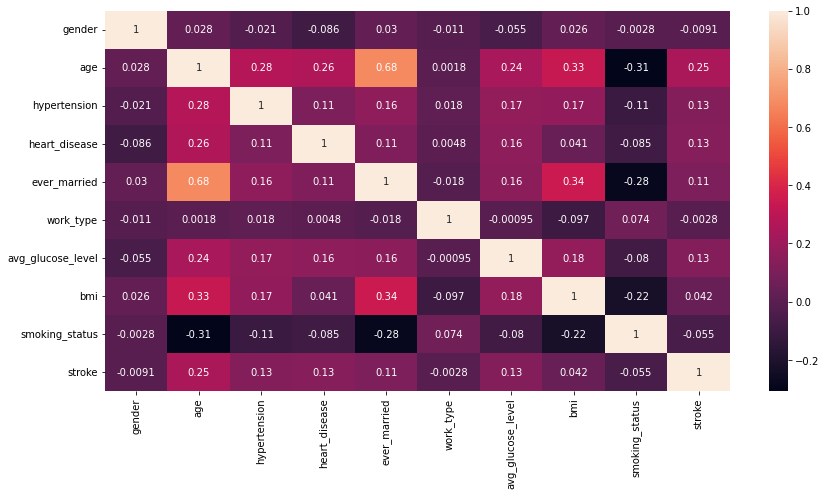

In [207]:
# Heatmap to check correlation
plt.figure(figsize=(14,7))
sns.heatmap(df_upd.corr(),annot=True) # (0.7-1)are high positve/negative

## NULL VALUES TREATMENT

In [208]:
avg_M_bmi=df_upd[df_upd['gender']==0]['bmi'].mean()
avg_F_bmi=df_upd[df_upd['gender']==1]['bmi'].mean()

In [209]:
for index, row in df_upd.iterrows():
    if row['gender'] == 0 and pd.isna(row['bmi']):
        df_upd.at[index, 'bmi'] = round(avg_M_bmi,1)
    elif row['gender'] == 1 and pd.isna(row['bmi']):
        df_upd.at[index, 'bmi'] = round(avg_F_bmi,1)

In [210]:
(df_upd.isnull().sum()/len(df_upd))*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [211]:
df_final=df_upd.copy()

## OUTLIER TREATMENT

In [212]:
cols=df_final[['age','work_type','avg_glucose_level', 'bmi','smoking_status','ever_married']].columns

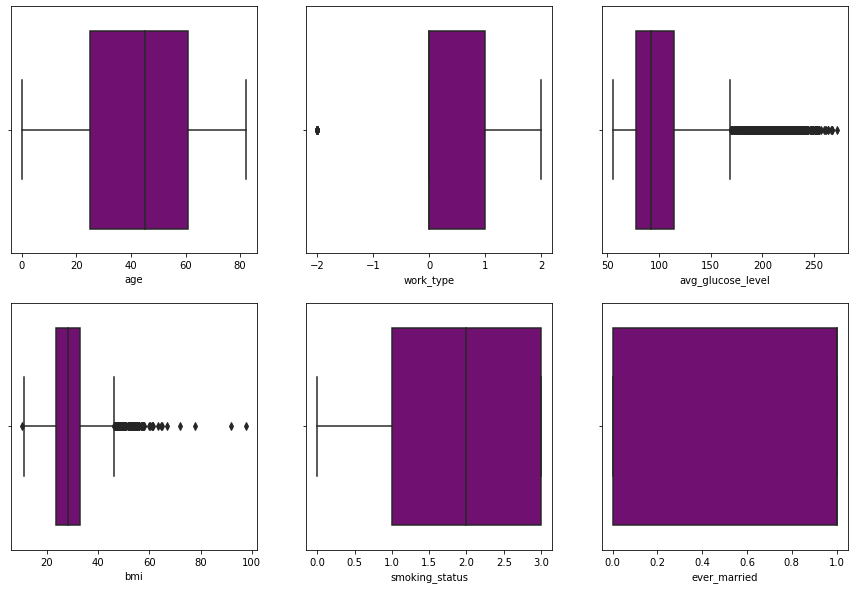

In [213]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
for i,subplots in zip(cols,ax.flatten()):
    sns.boxplot(df_final[i],ax=subplots,color='purple')

In [214]:
q1=df_final['avg_glucose_level'].quantile(0.25)
q2=df_final['avg_glucose_level'].quantile(0.75)
IQR=q2-q1
print(IQR)
ll=q1-(1.5*IQR)
ul=q2+(1.5*IQR)
print(ll,ul)

36.845
21.977500000000006 169.35750000000002


In [215]:
q1=df_final['bmi'].quantile(0.25)
q2=df_final['bmi'].quantile(0.75)
IQR=q2-q1
print(IQR)
ll=q1-(1.5*IQR)
ul=q2+(1.5*IQR)
print(ll,ul)

8.999999999999996
10.300000000000006 46.29999999999999


In [216]:
# considering avg_glucose_level and bmi are important and not treating outliers.

In [217]:
df_final.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,228.69,36.6,1,1
1,1,61.0,0,0,1,1,202.21,29.1,2,1


## Imbalanced_data 

0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

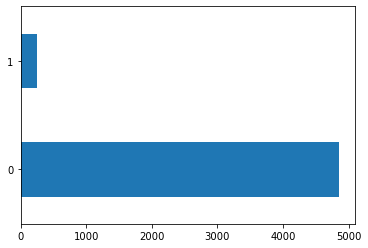

In [218]:
print(df_final.stroke.value_counts())
df_final['stroke'].value_counts().plot.barh()

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
x=df_final.drop('stroke',axis=1)
y=df_final['stroke']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [221]:
#!pip install imblearn

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
smote=SMOTE(sampling_strategy=0.3)
xtrain_resampled,ytrain_resampled=smote.fit_resample(xtrain,ytrain)

In [224]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain_resampled,ytrain_resampled,test_size=0.3,random_state=1)

0    3411
1    1023
Name: stroke, dtype: int64


<AxesSubplot:>

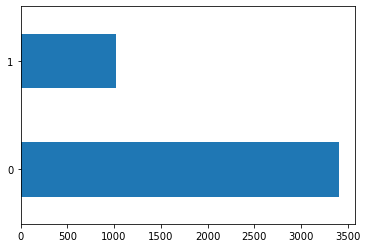

In [225]:
print(ytrain_resampled.value_counts())
ytrain_resampled.value_counts().plot.barh()

## 22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of performance on the given dataset.

## Model Evaluation 
- Evaluate the models using appropriate evaluation metrics

# LOGISTIC REGRESSION

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,roc_auc_score,f1_score,precision_score

In [227]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain_resampled,ytrain_resampled,test_size=0.3,random_state=1)
logreg=LogisticRegression()
logreg_pred=logreg.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,logreg_pred))
print(confusion_matrix(ytest,logreg_pred))
print(classification_report(ytest,logreg_pred))
train=logreg.predict(xtrain)
print(accuracy_score(ytrain,train))

accuracy    =accuracy_score(ytest,logreg_pred)
f1score    =f1_score(ytest,logreg_pred)
recall     =recall_score(ytest,logreg_pred)
precision   =precision_score(ytest,logreg_pred)
auc         = roc_auc_score(ytest,logreg_pred)

cols_per = ["Model", "Accuracy","Recall","Precision","F1 Score",'AUC']
result_per = pd.DataFrame(columns = cols_per)

model_per = pd.Series({  "Model": "LogisticRegression",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = result_per.append(model_per, ignore_index = True)

result_per

0.8437265214124718
[[942  85]
 [123 181]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1027
           1       0.68      0.60      0.64       304

    accuracy                           0.84      1331
   macro avg       0.78      0.76      0.77      1331
weighted avg       0.84      0.84      0.84      1331

0.8440219142765066


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.843727,0.595395,0.680451,0.635088,0.756315


# Decision_Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score

In [229]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain_resampled,ytrain_resampled,test_size=0.3,random_state=1)
dt=DecisionTreeClassifier(random_state=7)
dt_pred=dt.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,dt_pred))
print(confusion_matrix(ytest,dt_pred))
print(classification_report(ytest,dt_pred))
train=dt.predict(xtrain)
print(accuracy_score(ytrain,train))

accuracy    =accuracy_score(ytest,dt_pred)
f1score    =f1_score(ytest,dt_pred)
recall     =recall_score(ytest,dt_pred)
precision   =precision_score(ytest,dt_pred)
auc         = roc_auc_score(ytest,dt_pred)

model_per = pd.Series({  "Model": "DecisionTree-GINI",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = result_per.append(model_per, ignore_index = True)
result_per

0.8707738542449286
[[922 105]
 [ 67 237]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1027
           1       0.69      0.78      0.73       304

    accuracy                           0.87      1331
   macro avg       0.81      0.84      0.82      1331
weighted avg       0.88      0.87      0.87      1331

1.0


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.843727,0.595395,0.680451,0.635088,0.756315
1,DecisionTree-GINI,0.870774,0.779605,0.692982,0.733746,0.838683


## FEATURES_IMPORTANCE

In [230]:
feature_imp = pd.DataFrame()
feature_imp['Feature']=xtrain.columns
feature_imp['Importance']=dt.feature_importances_
feature_imp.sort_values(by='Importance',ascending=False)

,Feature,Importance
1,age,0.401565
6,avg_glucose_level,0.267309
7,bmi,0.132753
5,work_type,0.055187
8,smoking_status,0.049232
4,ever_married,0.035412
0,gender,0.027360
2,hypertension,0.022008
3,heart_disease,0.009174


In [231]:
x=df_final[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
y=df_final['stroke']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [232]:
dt_fi=DecisionTreeClassifier(random_state=7)
dt_pred_IF=dt_fi.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,dt_pred_IF))
print(confusion_matrix(ytest,dt_pred_IF))
print(classification_report(ytest,dt_pred_IF))
train=dt_fi.predict(xtrain)
print(accuracy_score(ytrain,train))

accuracy    =accuracy_score(ytest,dt_pred_IF)
f1score    =f1_score(ytest,dt_pred_IF)
recall     =recall_score(ytest,dt_pred_IF)
precision   =precision_score(ytest,dt_pred_IF)
auc         = roc_auc_score(ytest,dt_pred_IF)

model_per = pd.Series({  "Model": "DecisionTree-FEATUREIMP",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = result_per.append(model_per, ignore_index = True)
result_per

0.9093281148075668
[[1378   72]
 [  67   16]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1450
           1       0.18      0.19      0.19        83

    accuracy                           0.91      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.91      0.91      1533

1.0


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.843727,0.595395,0.680451,0.635088,0.756315
1,DecisionTree-GINI,0.870774,0.779605,0.692982,0.733746,0.838683
2,DecisionTree-FEATUREIMP,0.909328,0.192771,0.181818,0.187135,0.571558


## GRIDSEARCHCV

In [233]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'criterion': ['entropy','gini'], 
                     'max_depth': [2,4,6,8,10,12,14,16,18],
                     'min_samples_split':[45,55,65,75,85,95],
                     'min_samples_leaf': [15,20,25,30,35,40,45]
                     }]
dt = DecisionTreeClassifier(random_state = 7)
tree_grid = GridSearchCV(estimator = dt,
                         param_grid = tuned_paramaters, 
                         cv = 5)

In [234]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain_resampled,ytrain_resampled,test_size=0.3,random_state=1)
tree_grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                          'min_samples_leaf': [15, 20, 25, 30, 35, 40, 45],
                          'min_samples_split': [45, 55, 65, 75, 85, 95]}])

In [235]:
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 15,
 'min_samples_split': 45}

In [236]:
dt_grid_model = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth =14,
                                  min_samples_leaf=15,
                                  min_samples_split=45,     
                                  random_state = 7)
dt_pred_cv=dt_grid_model.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,dt_pred_cv))
print(confusion_matrix(ytest,dt_pred_cv))
print(classification_report(ytest,dt_pred_cv))
train=model.predict(xtrain)
print(accuracy_score(ytrain,train))

accuracy    =accuracy_score(ytest,dt_pred_cv)
f1score    =f1_score(ytest,dt_pred_cv)
recall     =recall_score(ytest,dt_pred_cv)
precision   =precision_score(ytest,dt_pred_cv)
auc         = roc_auc_score(ytest,dt_pred_cv)

model_per = pd.Series({  "Model": "DecisionTree-GRIDSEARCHCV",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = result_per.append(model_per, ignore_index = True)
result_per

0.8527422990232908
[[918 109]
 [ 87 217]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1027
           1       0.67      0.71      0.69       304

    accuracy                           0.85      1331
   macro avg       0.79      0.80      0.80      1331
weighted avg       0.86      0.85      0.85      1331

0.793747985820174


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.843727,0.595395,0.680451,0.635088,0.756315
1,DecisionTree-GINI,0.870774,0.779605,0.692982,0.733746,0.838683
2,DecisionTree-FEATUREIMP,0.909328,0.192771,0.181818,0.187135,0.571558
3,DecisionTree-GRIDSEARCHCV,0.852742,0.713816,0.665644,0.688889,0.803841


# RandomForest

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion = 'entropy',max_depth =14,
                        min_samples_leaf=15,
                        min_samples_split=45,     
                        random_state = 7)

In [238]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain_resampled,ytrain_resampled,test_size=0.3,random_state=1)
rf_pred=rf.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,rf_pred))
print(confusion_matrix(ytest,rf_pred))
print(classification_report(ytest,rf_pred))
train=rf.predict(xtrain)
print(accuracy_score(ytrain,train))

accuracy    =accuracy_score(ytest,rf_pred)
f1score    =f1_score(ytest,rf_pred)
recall     =recall_score(ytest,rf_pred)
precision   =precision_score(ytest,rf_pred)
auc         = roc_auc_score(ytest,rf_pred)

model_per = pd.Series({  "Model": "RandomForest",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = result_per.append(model_per, ignore_index = True)
result_per

0.8692712246431255
[[969  58]
 [116 188]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1027
           1       0.76      0.62      0.68       304

    accuracy                           0.87      1331
   macro avg       0.83      0.78      0.80      1331
weighted avg       0.86      0.87      0.86      1331

0.897518530454399


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.843727,0.595395,0.680451,0.635088,0.756315
1,DecisionTree-GINI,0.870774,0.779605,0.692982,0.733746,0.838683
2,DecisionTree-FEATUREIMP,0.909328,0.192771,0.181818,0.187135,0.571558
3,DecisionTree-GRIDSEARCHCV,0.852742,0.713816,0.665644,0.688889,0.803841
4,RandomForest,0.869271,0.618421,0.764228,0.683636,0.780973


In [ ]:
# RandomForest gave the best scores and no overfitting conditions in training data out of all build models.